In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

In [318]:
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


Step 1 : Data Exploration

In [319]:
# Display basic information about the dataset
display(df_final_demo.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


None

In [320]:
display(df_final_demo.describe())

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [321]:
df_final_demo['clnt_tenure_yr'].value_counts()

clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

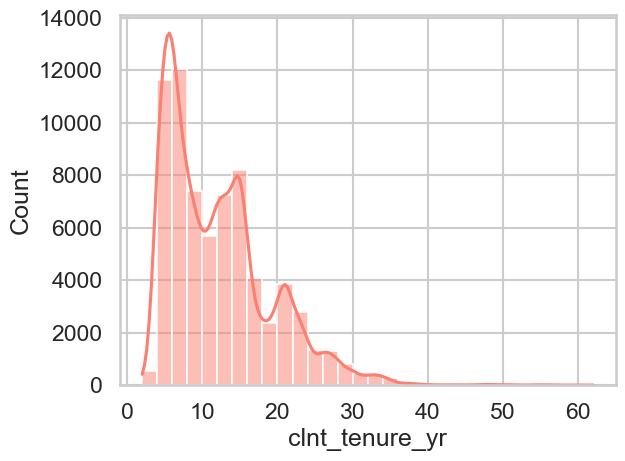

In [322]:
#Plotting a histogram for the 'clnt_tenure_yr' column 
sns.histplot(df_final_demo['clnt_tenure_yr'], kde=True, bins=30, color="salmon")

In [323]:
# Identify the primary clients 
df_final_demo['clnt_age'].value_counts()

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

<Axes: xlabel='clnt_age', ylabel='Count'>

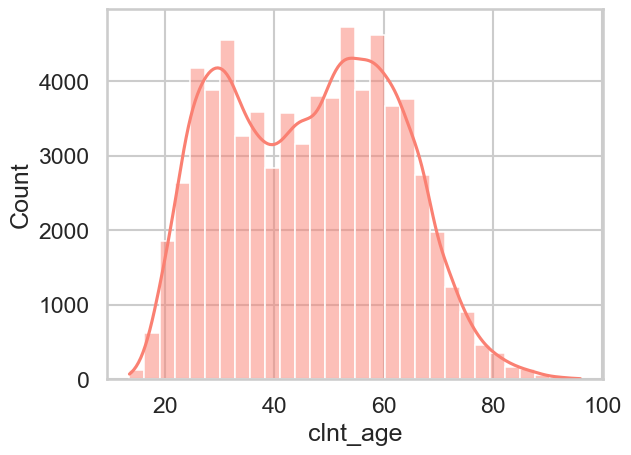

In [324]:
#Plotting a histogram for the 'clnt_age' column 
sns.histplot(df_final_demo['clnt_age'], kde=True, bins=30, color="salmon")

In [325]:
gender= df_final_demo.groupby("gendr")
gender.size() #What are U and X? We need to figure that out.

gendr
F    22746
M    23724
U    24122
X        3
dtype: int64

<Axes: ylabel='count'>

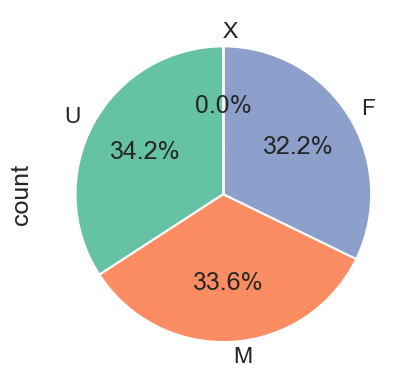

In [326]:
df_final_demo['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

In [327]:
df_final_demo['num_accts'].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: ylabel='count'>

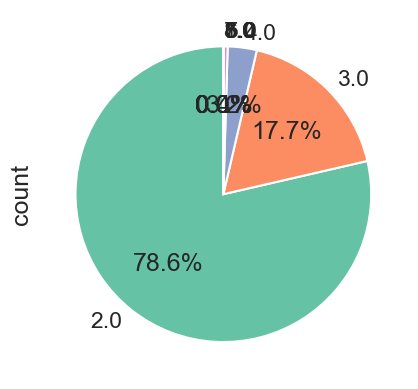

In [328]:
df_final_demo['num_accts'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

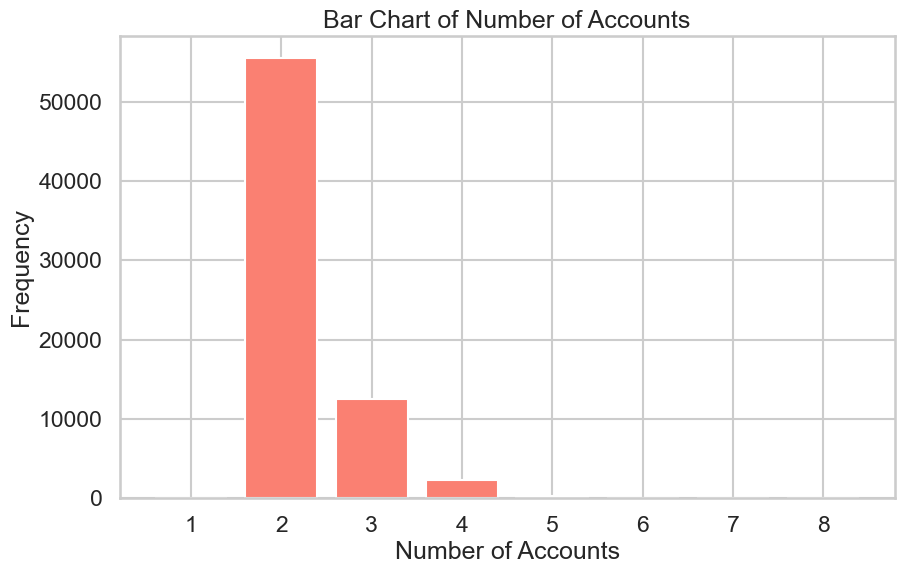

In [329]:
#Plotting a histogram for the 'num_accts' column 
import matplotlib.pyplot as plt

# Assuming df_final_demo is your dataframe and 'num_accts' is your column
num_accts_counts = df_final_demo['num_accts'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(num_accts_counts.index, num_accts_counts.values, color='salmon')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.title('Bar Chart of Number of Accounts')
plt.show()

In [330]:
# Identify the primary clients 
df_final_demo['bal'].describe()

count    7.059500e+04
mean     1.474452e+05
std      3.015087e+05
min      1.378942e+04
25%      3.734683e+04
50%      6.333290e+04
75%      1.375449e+05
max      1.632004e+07
Name: bal, dtype: float64

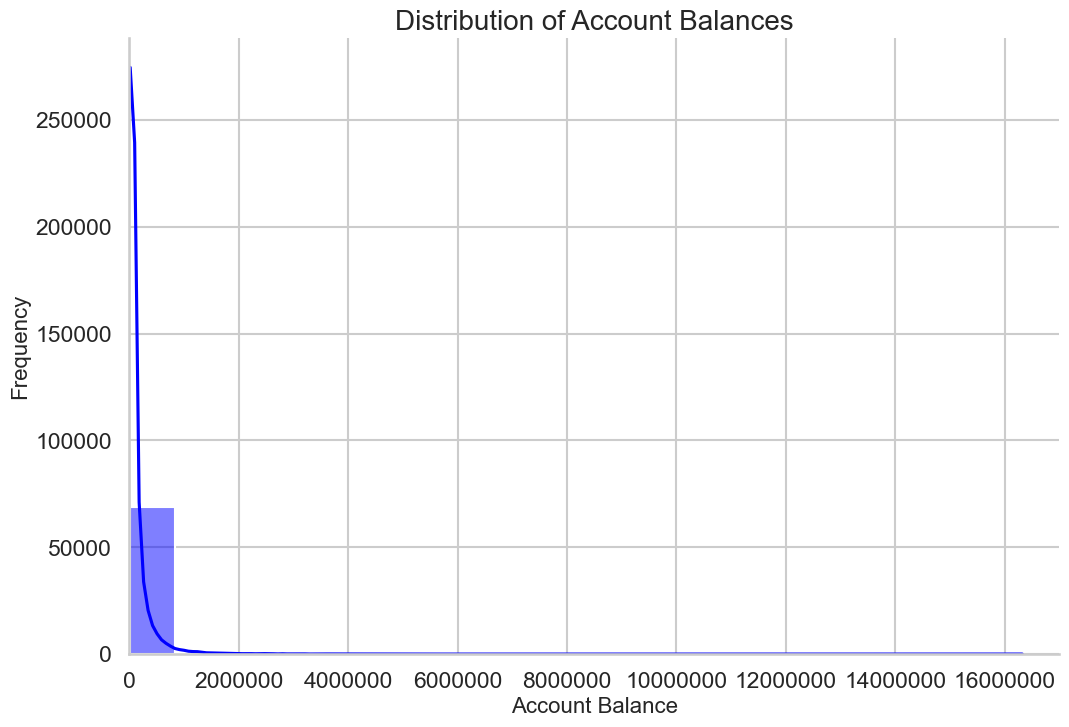

In [331]:
# Define the number of bins
bins = 20

# Set the style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the histogram plot
plt.figure(figsize=(12, 8))
sns.histplot(df_final_demo['bal'], kde=True, bins=bins, color="blue")

# Add titles and labels
plt.title('Distribution of Account Balances', fontsize=20)
plt.xlabel('Account Balance', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Customize the grid and remove the top and right spines
sns.despine()

# Set x-axis limits
plt.xlim(0, 17000000)

# Remove scientific notation on the x-axis
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.show()

In [332]:
# Identify primary clients based on logons_6_mnth
median_logons = df_final_demo['logons_6_mnth'].median()
median_logons

5.0

In [333]:
# Assuming primary clients are those who logged on more frequently than the median number of logons
primary_clients = df_final_demo[df_final_demo['logons_6_mnth'] > median_logons]
primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
...,...,...,...,...,...,...,...,...,...
70590,2721884,15.0,190.0,53.5,F,2.0,32797.00,6.0,6.0
70592,4277747,12.0,155.0,40.0,M,3.0,36278.71,6.0,6.0
70593,7217125,14.0,178.0,58.5,U,2.0,319382.04,5.0,6.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0


In [334]:
df_final_demo['clnt_age'].mean()

46.442240133722414

# Cleaning df_final_demo 

In [335]:
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [336]:
null_rows = df_final_demo[df_final_demo["bal"].isnull()]
null_rows

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
df_final_demo.dropna(subset = "bal", inplace=True) 

In [338]:
df_final_demo.dropna(subset = "clnt_age", inplace=True)

In [339]:
df_final_demo.dtypes # Client id should be an string because it is categorical data

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [340]:
x_rows = df_final_demo[df_final_demo["gendr"] == "X"]
x_rows

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
17728,4806791,11.0,136.0,40.0,X,2.0,31437.35,6.0,9.0
19475,5537155,9.0,113.0,26.0,X,2.0,25380.34,1.0,4.0
53592,1807720,9.0,110.0,52.0,X,3.0,25710.63,4.0,5.0


# Cleaning df part 1

In [341]:
df_pt1 = pd.read_csv("data/df_final_web_data_pt_1.txt")
df_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [342]:
df_pt1.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

# Clean part 2

In [343]:
df_pt2 = pd.read_csv("data/df_final_web_data_pt_2.txt")
df_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [344]:
df_pt2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [345]:
df = pd.concat([df_pt1,df_pt2], axis = 0)
df.sort_values(by="client_id", ascending=True, inplace=True)

In [346]:
df

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
305388,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28


In [347]:
df.date_time.unique()

array(['2017-04-12 20:22:05', '2017-04-12 20:23:09',
       '2017-04-12 20:20:31', ..., '2017-06-01 22:44:58',
       '2017-06-01 22:41:28', '2017-06-01 22:41:47'], dtype=object)

In [348]:
clientfreq = df.groupby("client_id")
clientfreq.size()

client_id
169         5
336         2
546         5
555         5
647         5
           ..
9999729    11
9999768    12
9999832     2
9999839     6
9999875     6
Length: 120157, dtype: int64

# **SPACE**

In [349]:
new_df = pd.merge(df_final_demo, df, how="left", on = "client_id")
new_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,2017-04-05 11:41:04
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02


In [350]:
# Create a new time column

#new_df["time"] = new_df["date_time"].str.split(" ").str[1]
#new_df["date_time"] = new_df["date_time"].str.split(" ").str[0].rename("date")
#new_df

new_df["date_time"]= new_df["date_time"].str.split(" ")
new_df


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,"[2017-04-02, 11:46:45]"
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,"[2017-04-02, 11:21:28]"
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,"[2017-03-29, 11:02:44]"
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,"[2017-04-02, 11:22:24]"
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,"[2017-03-29, 11:01:40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,"[2017-04-05, 11:43:10]"
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,step_1,"[2017-04-05, 11:41:32]"
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,"[2017-04-05, 11:41:04]"
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,"[2017-04-05, 11:48:02]"


In [351]:
new_df["date_time"]= new_df["date_time"].astype(str)
new_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,"['2017-04-02', '11:46:45']"
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,"['2017-04-02', '11:21:28']"
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,"['2017-03-29', '11:02:44']"
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,"['2017-04-02', '11:22:24']"
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,"['2017-03-29', '11:01:40']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,"['2017-04-05', '11:43:10']"
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,step_1,"['2017-04-05', '11:41:32']"
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,"['2017-04-05', '11:41:04']"
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,"['2017-04-05', '11:48:02']"


In [353]:
new_df["time"]= new_df["date_time"].str[1]
new_df



,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,[,NaN
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,start,[,NaN
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,[,NaN
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,[,NaN
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,104438405_2368283624_817211,start,[,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,step_2,[,NaN
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,step_1,[,NaN
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,884309593_49820690623_654151,start,[,NaN
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,962766819_57063135389,158544612_4105226940_43043,confirm,[,NaN


In [ ]:
clnt_age_freq_steps = new_df.groupby("clnt_age")["process_step"].count().sort_values(ascending = False)
clnt_age_freq_steps

clnt_age
58.5    6432
57.5    6115
52.5    6061
59.5    6037
55.5    5913
        ... 
96.0      10
14.0      10
13.5       9
95.5       6
94.5       5
Name: process_step, Length: 165, dtype: int64

In [ ]:
group_age= new_df.groupby("clnt_age")["logons_6_mnth"].mean()
group_age.sort_values(ascending=False, inplace=True)
group_age = pd.DataFrame(group_age)
group_age

,logons_6_mnth
clnt_age,
93.0,7.888889
83.0,7.523077
82.5,7.282609
78.5,7.146435
85.0,7.123894
...,...
16.5,3.760722
16.0,3.619048
15.5,3.347015


In [ ]:
group_age.reset_index(inplace=True)
group_age.rename(columns={'index': 'clnt_age'}, inplace=True)

In [ ]:
group_age

,clnt_age,logons_6_mnth
0,93.0,7.888889
1,83.0,7.523077
2,82.5,7.282609
3,78.5,7.146435
4,85.0,7.123894
...,...,...
160,16.5,3.760722
161,16.0,3.619048
162,15.5,3.347015
163,15.0,3.122642


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9')])

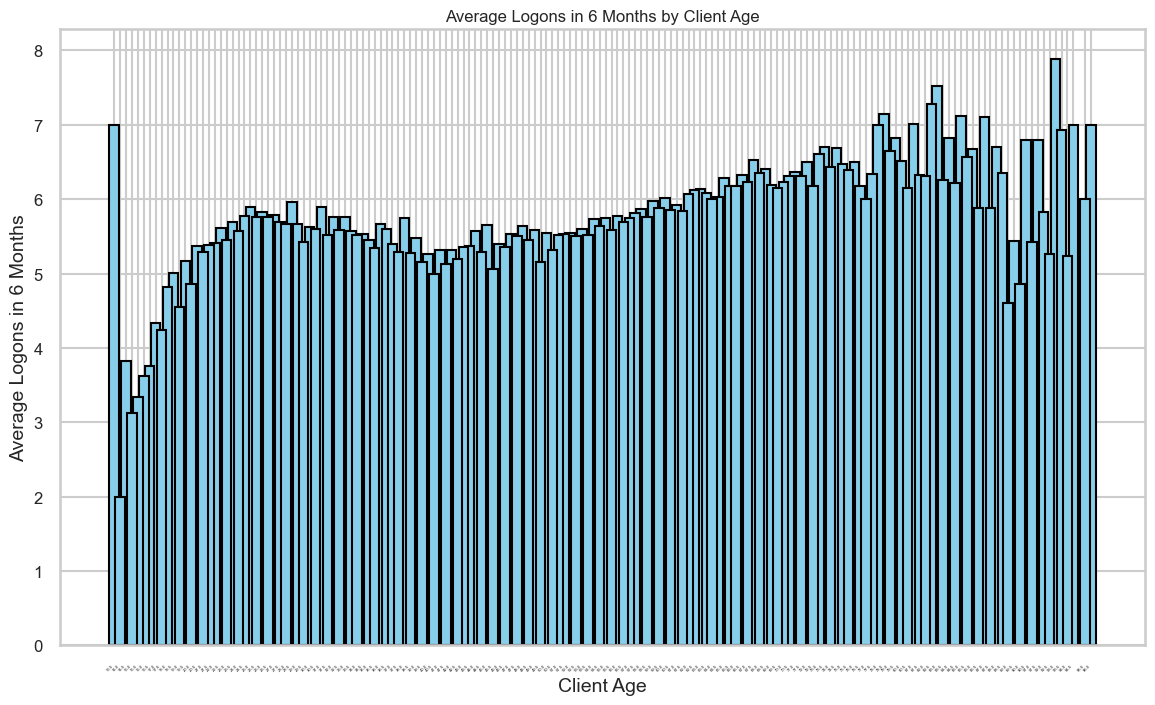

In [ ]:
plt.figure(figsize=(14, 8))
bars = plt.bar(group_age['clnt_age'], group_age['logons_6_mnth'], color='skyblue', edgecolor='k')
plt.xlabel('Client Age', fontsize=14)
plt.ylabel('Average Logons in 6 Months', fontsize=14)
plt.title('Average Logons in 6 Months by Client Age', fontsize=12)
plt.xticks(group_age['clnt_age'], rotation=45, ha='right', fontsize=3)
plt.yticks(fontsize=12)

# **SPACE**

In [ ]:
df_final_experiment_clients = pd.read_csv("data/df_final_experiment_clients.txt")
df_final_experiment_clients


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [ ]:
df_final_experiment_clients.Variation.unique()

array(['Test', 'Control', nan], dtype=object)

In [ ]:
variation = df_final_experiment_clients.groupby("Variation")
variation.size()

Variation
Control    23532
Test       26968
dtype: int64

In [ ]:
df_final_experiment_clients.isna().sum()

client_id        0
Variation    20109
dtype: int64

# KPI's